In [1]:
#!/usr/bin/env python3 

In [18]:
# Importing the necessary modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [19]:
# specifying the path to dataset 
dataset = 'stocks.csv'

# loading the datset into memroy 
df = pd.read_csv(dataset, delimiter = ',')
df.head() 

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [20]:
#
df = df.loc[df['Name'] == 'ZTS']
df.head() 

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [44]:
# Importing the training set 
training_set = df.iloc[:, 1:2].values

In [45]:
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [51]:
training_set = sc.inverse_transform(training_set)

In [29]:
# Creating a data structure with 60 timesteps and 1 output 
X_train = []
y_train = []
# 
for i in range(60, 1258):
    X_train.append(training_set[i - 60:i, 0])
    y_train.append(training_set[i, 0])
# 
X_train, y_train = np.array(X_train), np.array(y_train)

# 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
# building the keras model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 

In [36]:
# model building 
model = Sequential() 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# 
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# 
model.add(Dense(units = 1))
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)               

In [37]:
# compiling the RNN model 
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 2)

Train on 1198 samples
Epoch 1/10
1198/1198 - 4s - loss: 0.0022 - accuracy: 0.0017
Epoch 2/10
1198/1198 - 4s - loss: 0.0022 - accuracy: 0.0017
Epoch 3/10
1198/1198 - 4s - loss: 0.0022 - accuracy: 0.0017
Epoch 4/10
1198/1198 - 3s - loss: 0.0018 - accuracy: 0.0017
Epoch 5/10
1198/1198 - 3s - loss: 0.0016 - accuracy: 0.0017
Epoch 6/10
1198/1198 - 3s - loss: 0.0019 - accuracy: 0.0017
Epoch 7/10
1198/1198 - 3s - loss: 0.0017 - accuracy: 0.0017
Epoch 8/10
1198/1198 - 3s - loss: 0.0017 - accuracy: 0.0017
Epoch 9/10
1198/1198 - 3s - loss: 0.0017 - accuracy: 0.0017
Epoch 10/10
1198/1198 - 3s - loss: 0.0016 - accuracy: 0.0017


In [43]:
# getting the predicted stock price  
predicted_stock_price = model.predict(X_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

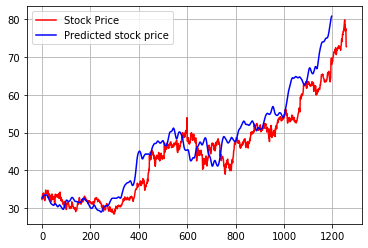

In [53]:
# Visualising the results 
plt.plot(training_set, color='red', label='Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.grid(True)
plt.legend() 
plt.show() 